# RobotCar
## Introduction
Cette activité vise à vous offrir une situation d'apprentissage pour travailler les capacités suivantes du chapitre Programmation Orientée Objet :
- Modifier les méthodes d'une classe
- Accéder aux attributs d'un objet depuis une de ses méthodes (self)
- Lire la valeur d'un attribut d'objet


## Comment Démarrer ?
### Installation
Pour fonctionner il faut que la bibliothèque **pygame** soit installée pour l'interpréteur qui exécutera le programme.

### Lancement
Exécuter le fichier main.py avec python en ligne de commande avec :
```
python main.py
```
Ou depuis son IDE.

Sélectionner un niveau avec les flèches de direction puis la touche **Entrée**. Sortir du niveau ou du programme avec la touche **Echap**.

### Interaction
Ouvrir le fichier **voiture.py** du dossier **actors**.  Les modifications apportées à la classe Voiture ont un impact sur le comportement des voitures dans le jeu.


## Comment ça fonctionne ?
Le programme déplace les différentes instances de la voiture selon le code que vous aurez écrit dans la classe Voiture. Les voitures sont instanciées selon la configuration du niveau lancé.

A intervalle régulier, le programme interroge les 3 méthodes suivantes de l'instance à déplacer :
- **tourner_gauche()** : doit retourner True si l'instance de la voiture doit tourner à gauche, False sinon.
- **tourner_droite()** : doit retourner True si l'instance de la voiture doit tourner à droite, False sinon.
- **avancer()** : doit retourner True si l'instance de la voiture doit avancer sur la case devant elle, False sinon.


## Faisons un test ! Niveau 1

Si vous n'avez pas essayé de lancer le programme, faite-le. Choisissez le **niveau 1** et observez : la ou les voitures instanciées n'avancent pas (si leur code renvoi False à chaque méthode).

Sortez du niveau puis du programme (appuyer 2 fois sur ECHAP), puis modifiez la méthode Voiture.avancer() de sorte qu'elle retourne True.

In [ ]:

from ...environment.tiles import Tuile

In [ ]:
#! Le code ici n'est pas vraiment exécutable. Il est présenté à titre d'exemple, afin que
# Vous puissiez reporter les modifications dans le fichier voiture.py

class Voiture:
    # -------------------
    # ... Extrait de code
    def avancer(self, position: Tuile) -> bool:
        """
        Le jeu interroge la voiture pour déterminer si elle souhaite avancer.
        :param position : Objet Tuile sur laquelle se trouve la voiture.
        :return: Vrai ou Faux selon qu'il faille avancer ou pas.
        """
        return True

Relancez le programme et le **niveau 1** : les voitures avancent. Tant qu'elles n'ont pas d'accident ou qu'elles ne sortent pas de la route !

Vous pouvez tester de retourner **True** sur une méthode tourner_gauche() ou tourner_droite() pour voir ce que cela produit. Mais pas les 2 en même temps ! Car tourner à droite ET à gauche dans le même tour s'annule, la voiture va alors aller tout droit.

## Programmer un comportement qui s'adapte : lire l'environnement
Pour passer les niveaux, vos voitures doivent s'adapter à leur environnement pour rester sur la route et éviter les obstacles.

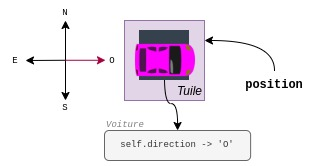

Chaque instance de voiture possède un attribut **direction** valorisé par la cardinalité de la voiture (*nord, sud, est* ou *ouest*) représentée par une lettre 'N', 'S', 'E' ou 'O'.

Les informations sur l'environnement sont obtenue à travers la variable **position** qui est passée en paramètre par le programme à l'instance de la voiture. Cette variable pointe vers l'instance de la classe Tuile qui représente la case du plateau sur laquelle se trouve la voiture.
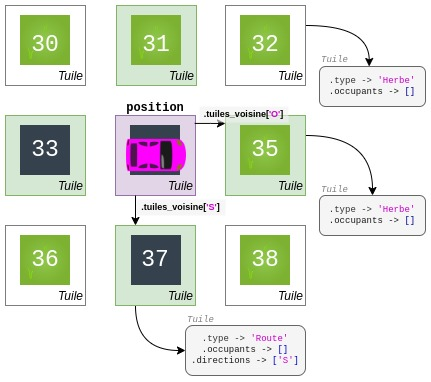

Cet objet est caractérisé par plusieurs attributs dont un nommé **tuiles_voisines** qui est valorisé par un dictionnaire. Ce dictionnaire contient une *clé* pour chaque cardinalité, dont la *valeur* pointe vers l'instance Tuile correspondante.

In [ ]:
# Exemple pour le cas présenté ci-dessus (voir image)

position.tuiles_voisines = {'N':tuile_31, 'O':tuile_35, 'S':tuile_37, 'E':tuile_33}


Les instances de Tuile mettent à disposition plusieurs attributs utiles que vous pouvez identifier en observant le code de la classe.

In [ ]:
class Tuile:
    def __init__(self, props, x_pos, y_pos, end_tile):
        """
        Constructeur de la classe Tuile.
        :param props: Propriétés extraites du fichier de niveau.
        :param x_pos: Coordonnée X dans la tuile dans la grille du niveau.
        :param y_pos: Coordonnée Y dans la tuile dans la grille du niveau.
        :param end_tile: instance de Fin sur laquelle les voitures arrivent quand elles dépassent le bord.
        """
        self.occupants = []
        self.tuiles_voisines = {"N": end_tile, "S": end_tile, "E": end_tile, "O": end_tile}
        self.types_voisins = {"N": "Fin", "S": "Fin", "E": "Fin", "O": "Fin"}

        self.coordonnees = {"x": x_pos, "y": y_pos}
        self.type = props["type"]
        if self.type == "Route":
            self.directions = props["directions"]

## A vous de jouer !

A partir de ces données, vous pouvez programmer le code de chacune des méthodes de la classe Voiture afin que chaque instance puisse traverser les niveaux sans accident ni sorties de route.

Trouvez une solution qui permettent de valider tous les niveaux sans avoir à modifier le code.

## Niveau 2

Les voitures arrivent en collision si l'une ne laisse pas la priorité à l'autre. Une propriété de la tuile vous permettra de déterminer si une autre voiture est déjà présente sur une tuile.

## Niveau 3

Attention aux virages !
Avant d'avancer, en plus de vérifier qu'il n'y a personne vous pourriez vérifier que la route continue dans la direction de la voiture.
Ensuite il faudra orienter la voiture à gauche ou à droite selon la position de la route, que vous pouvez détecter avec le bon attribut.

## Niveau 4

Chacun sa voie !

## Niveau 5

On additionne les difficultés !